In [1]:
import os
import torch
import numpy as np
import pandas as pd
import pytorch_lightning as pl
import matplotlib.pyplot as plt
from pytorch_lightning.callbacks import ModelCheckpoint
from pytorch_lightning.callbacks.early_stopping import EarlyStopping
from torch.utils.data import DataLoader
from modules.lifter_2d_3d.dataset.groundtruth_keypoint_dataset import GroundTruthKeypointDataset
from modules.lifter_2d_3d.model.linear_model.lit_linear_model import LitSimpleBaselineLinear
from modules.utils.visualization import (
    plot_samples
)
from IPython.display import display
from pathlib import Path
pl.seed_everything(1234)

# ------------
# dataset path
# ------------
dataset_root_path = Path('/root/data/processed/synthetic_cabin_ir/Rear_Mirror')
annotation_path = dataset_root_path / 'annotations'
# ------------
# model
# ------------
image_width = 1280
image_height = 1024
batch_size = 64
max_epoch = 10
val_check_period = 5
early_stopping_patience = 5
lit_model = LitSimpleBaselineLinear(exclude_ankle=True, exclude_knee=True)
# ------------
# saved model path
# ------------
saved_model_path = './saved_lifter_2d_3d_model/linear_model/synthetic_cabin_ir/Rear_Mirror/gt_2d/'

train_dataset = GroundTruthKeypointDataset(
    annotation_file=(annotation_path / 'person_keypoints_train.json').as_posix(),
    image_width=image_width,
    image_height=image_height,
    exclude_ankle=True,
    exclude_knee=True,
    is_center_to_neck=True,
    is_normalize_to_bbox=False,
    is_normalize_to_pose=True,
    is_normalize_rotation=True
)
val_dataset = GroundTruthKeypointDataset(
    annotation_file=(annotation_path / 'person_keypoints_val.json').as_posix(),
    image_width=image_width,
    image_height=image_height,
    exclude_ankle=True,
    exclude_knee=True,
    is_center_to_neck=True,
    is_normalize_to_bbox=False,
    is_normalize_to_pose=True,
    is_normalize_rotation=True
)
test_dataset = GroundTruthKeypointDataset(
    annotation_file=(annotation_path / 'person_keypoints_test.json').as_posix(),
    image_width=image_width,
    image_height=image_height,
    exclude_ankle=True,
    exclude_knee=True,
    is_center_to_neck=True,
    is_normalize_to_bbox=False,
    is_normalize_to_pose=True,
    is_normalize_rotation=True
)

print(
    'train_dataset', len(train_dataset),
    'val_dataset', len(val_dataset),
    'test_dataset', len(test_dataset)
)
train_loader = DataLoader(train_dataset, batch_size=batch_size, drop_last=True, shuffle=True, num_workers=24)
val_loader = DataLoader(val_dataset, batch_size=batch_size, drop_last=True, num_workers=24)
test_loader = DataLoader(test_dataset, batch_size=batch_size, num_workers=24)

model_checkpoint = ModelCheckpoint(monitor='val_loss',mode='min', save_top_k=1)
early_stopping = EarlyStopping(monitor='val_loss', mode='min', patience=early_stopping_patience)


if not os.path.exists(saved_model_path):
    os.makedirs(saved_model_path)

device = 'cuda' if torch.cuda.is_available() else 'cpu'
trainer = pl.Trainer(
    # max_steps=10,
    max_epochs=max_epoch,
    callbacks=[model_checkpoint, early_stopping],
    accelerator=device,
    check_val_every_n_epoch=val_check_period,
    default_root_dir=saved_model_path,
    gradient_clip_val=1.0
)
trainer.fit(lit_model, train_loader, val_loader)

Global seed set to 1234
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


train_dataset 37499 val_dataset 6250 test_dataset 6251


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name  | Type          | Params
----------------------------------------
0 | model | BaselineModel | 4.3 M 
----------------------------------------
4.3 M     Trainable params
0         Non-trainable params
4.3 M     Total params
17.105    Total estimated model params size (MB)


Sanity Checking: 0it [00:00, ?it/s]

check #0
val MPJPE from: 128 samples : 2746.6142177581787
activity_macro_mpjpe nan


/opt/conda/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

check #1
training loss from 2925 batches: 288.94872402024066
val MPJPE from: 6208 samples : 47.94960841536522
activity_macro_mpjpe nan


Validation: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=10` reached.


check #2
training loss from 2925 batches: 67.58745332176869
val MPJPE from: 6208 samples : 38.494061678647995
activity_macro_mpjpe nan


In [2]:
with open(f'{saved_model_path}/best_model_path.txt', 'w') as f:
    f.writelines(model_checkpoint.best_model_path)
best_checkpoint_path = model_checkpoint.best_model_path
trainer.test(ckpt_path=best_checkpoint_path, dataloaders=test_loader)

Restoring states from the checkpoint path at saved_lifter_2d_3d_model/linear_model/synthetic_cabin_ir/Rear_Mirror/gt_2d/lightning_logs/version_8/checkpoints/epoch=9-step=5850.ckpt
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
Loaded model weights from the checkpoint at saved_lifter_2d_3d_model/linear_model/synthetic_cabin_ir/Rear_Mirror/gt_2d/lightning_logs/version_8/checkpoints/epoch=9-step=5850.ckpt


Testing: 0it [00:00, ?it/s]

MPJPE: 43.47564911338715
PJPE
                     PJPE
nose            36.176895
left_eye        35.831834
right_eye       37.976564
left_ear        31.695972
right_ear       29.439609
left_shoulder    9.246530
right_shoulder   8.494990
left_elbow      84.170615
right_elbow     61.630512
left_wrist      57.783366
right_wrist     61.673252
left_hip        53.525256
right_hip       57.538043
activities_mpjpe:
{}
test mpjpe: 43.47564911338715
activity_macro_mpjpe nan


┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│           mpjpe           │     43.47564911338715     │
└───────────────────────────┴───────────────────────────┘

[{'mpjpe': 43.47564911338715}]

In [3]:
trainer.model.test_history[0]['pjpe']

,PJPE
nose,36.176895
left_eye,35.831834
right_eye,37.976564
left_ear,31.695972
right_ear,29.439609
left_shoulder,9.246530
right_shoulder,8.494990
left_elbow,84.170615
right_elbow,61.630512
left_wrist,57.783366


In [4]:
trainer.model.test_history[0]['mpjpe']

43.47564911338715

[465.0, 328.0, 724.0, 722.0]
[483.0, 420.0, 730.0, 662.0]
[474.0, 212.0, 725.0, 645.0]


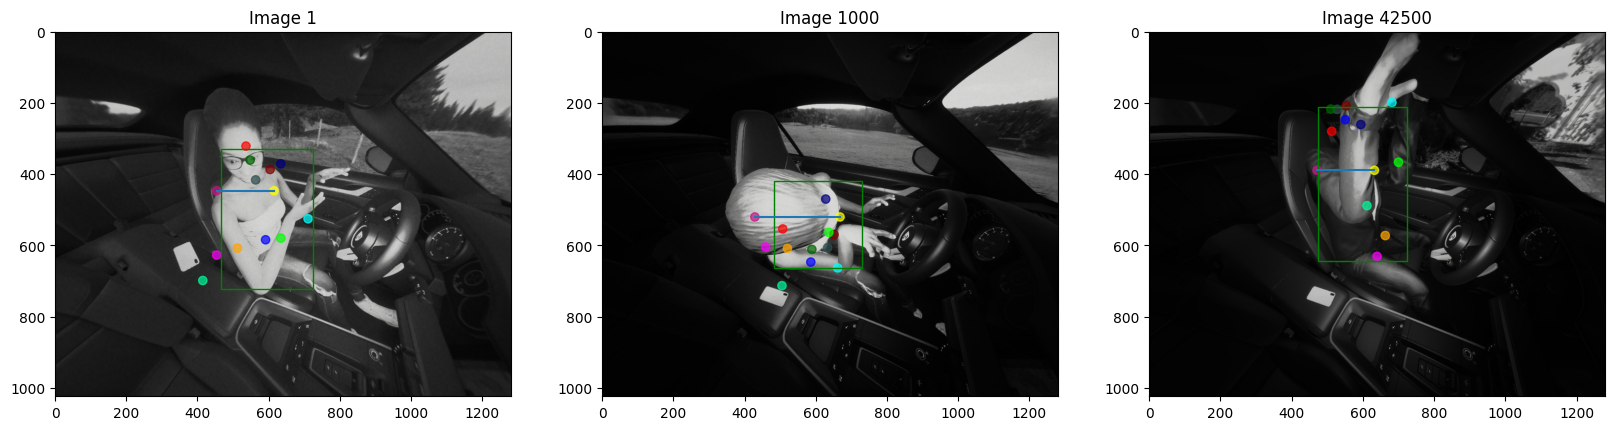

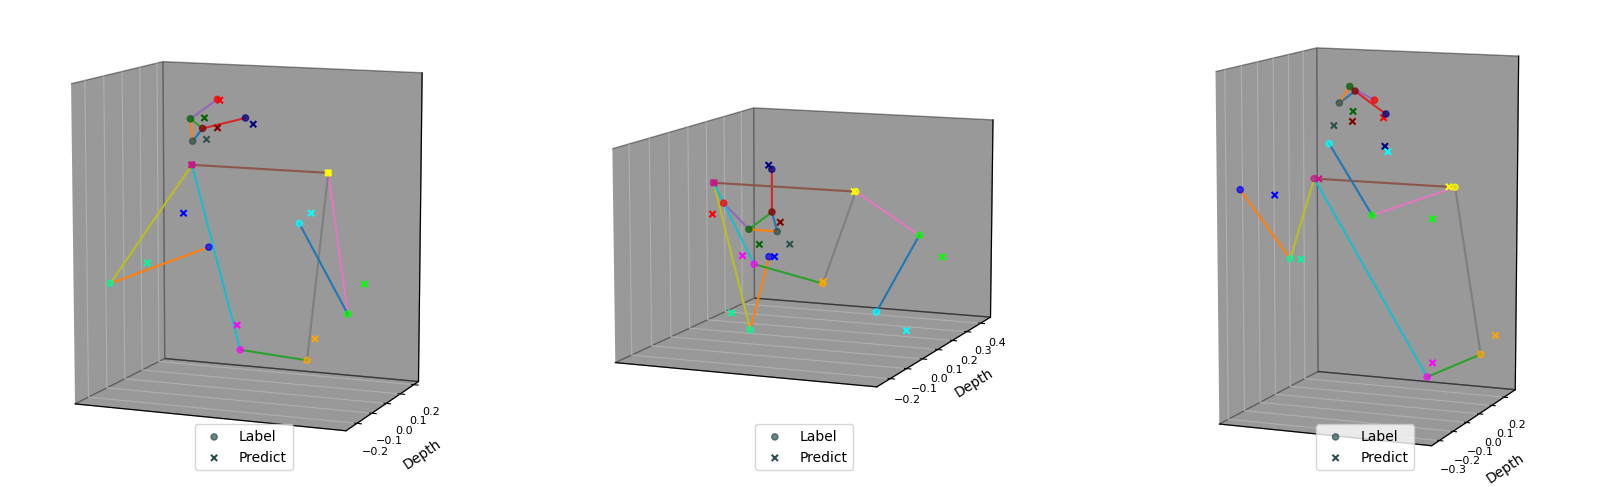

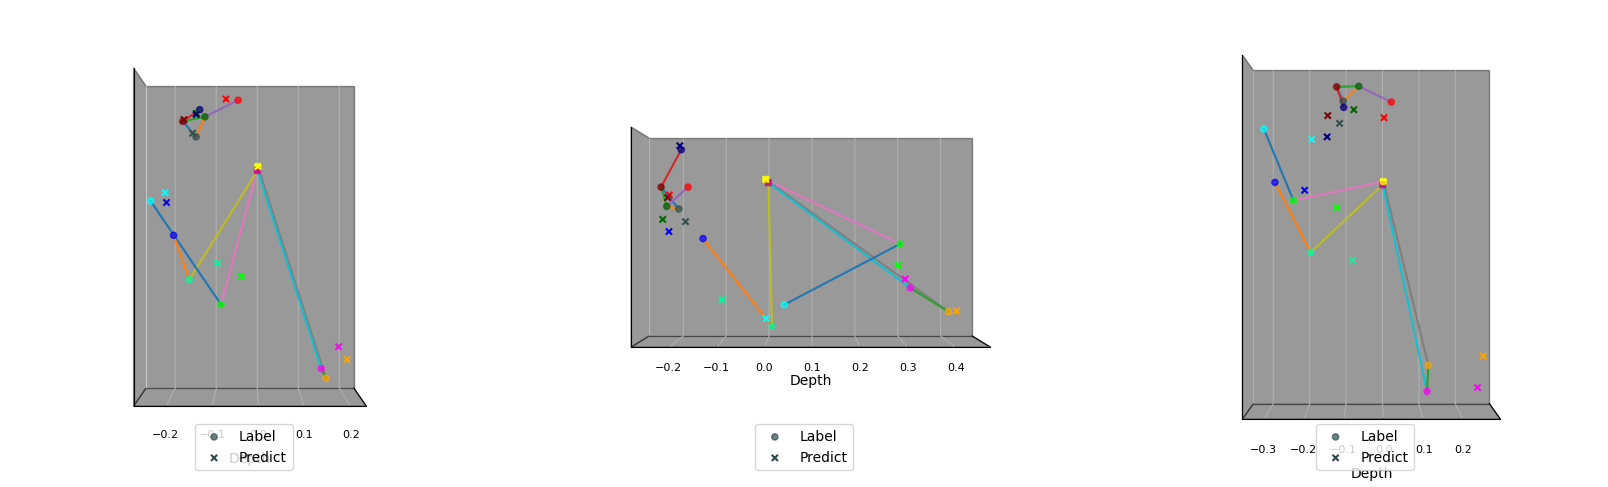

In [5]:
plot_samples(
    dataset_root_path,
    trainer.model,
    test_loader,
    'test',
    img_figsize=(20, 10),
    # img_width=image_width,
    # img_height=image_height,
    plot_figsize=(20.5, 10),
    sample_indices=[1, 1000, 5000]
)

In [6]:
import torch
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import mmcv
from mmengine.visualization import Visualizer
from pprint import pprint
import pandas as pd
from mmpose.apis import MMPoseInferencer
from modules.utils.visualization import generate_connection_line, joint_colors
from modules.lifter_2d_3d.model.linear_model.lit_linear_model import LitSimpleBaselineLinear
from modules.lifter_2d_3d.model.semgcn.lit_semgcn import LitSemGCN
from modules.lifter_2d_3d.model.graformer.lit_graformer import LitGraformer
from modules.lifter_2d_3d.utils.normalization import rotate2D_to_x_axis, rotate3D_to_x_axis

## DEFINE MODELS
### Faster RCNN for Human Detection
mmdet_config_path = './modules/human_detector/config/faster_rcnn.py'
mmdet_model_weight = 'https://download.openmmlab.com/mmdetection/v2.0/faster_rcnn/'\
        'faster_rcnn_r50_fpn_1x_coco-person/faster_rcnn_r50_fpn_1x_coco-person_20201216_175929-d022e227.pth'

### HR-Net for 2D Pose Estimation
mmpose_config_path = './modules/pose_estimator_2d/config/hrnet.py'
mmpose_model_weight = 'https://download.openmmlab.com/mmpose/v1/'\
        'body_2d_keypoint/topdown_heatmap/coco/'\
            'td-hm_hrnet-w48_udp-8xb32-210e_coco-384x288-70d7ab01_20220913.pth'
mmpose_inferencer = MMPoseInferencer(
    pose2d=mmpose_config_path,
    pose2d_weights=mmpose_model_weight,
    det_model=mmdet_config_path,
    det_weights=mmdet_model_weight,
    det_cat_ids=[0]
)


Loads checkpoint by http backend from path: https://download.openmmlab.com/mmpose/v1/body_2d_keypoint/topdown_heatmap/coco/td-hm_hrnet-w48_udp-8xb32-210e_coco-384x288-70d7ab01_20220913.pth
01/22 12:58:22 - mmengine - WARNING - Failed to search registry with scope "mmpose" in the "function" registry tree. As a workaround, the current "function" registry in "mmengine" is used to build instance. This may cause unexpected failure when running the built modules. Please check whether "mmpose" is a correct scope, or whether the registry is initialized.
01/22 12:58:22 - mmengine - WARNING - `Visualizer` backend is not initialized because save_dir is None.
Loads checkpoint by http backend from path: https://download.openmmlab.com/mmdetection/v2.0/faster_rcnn/faster_rcnn_r50_fpn_1x_coco-person/faster_rcnn_r50_fpn_1x_coco-person_20201216_175929-d022e227.pth
01/22 12:58:23 - mmengine - WARNING - Failed to search registry with scope "mmdet" in the "function" registry tree. As a workaround, the curr

In [7]:
images = []
num_keypoints = 13
frame_numbers = [0, 100, 1000, 2000, 3000, 4000, 5000]
# frame_numbers = [1000]
from scipy import ndimage
import cv2
import matplotlib.patches as patches
from modules.lifter_2d_3d.utils.normalization import rotate2D_to_x_axis, rotate3D_to_x_axis
from modules.utils.visualization import generate_connection_line, joint_colors

# for frame_number in frame_numbers:
#     cap.set(cv2.CAP_PROP_POS_FRAMES, frame_number)
#     _, image = cap.read()
#     # image = cv2.rotate(image, cv2.ROTATE_90_COUNTERCLOCKWISE)
#     # image = ndimage.rotate(image, 40)
#     images.append(image)
# images = [cv2.imread('/root/data/processed/drive_and_act/images/train/34770.jpg')]
# images = [cv2.imread('/root/data/processed/drive_and_act/images/train/34770.jpg')]
# images = [cv2.imread('/root/synthetic_cabin_1m/syntheticcabin_1mil/processed_syntheticCabin_1m/A_Pillar_Codriver/images/test/000000446876.jpg')]
images = [cv2.imread('/root/data/processed/synthetic_cabin_ir/Rear_Mirror/images/test/000000000006.jpg')]
# images = [cv2.imread('/root/data/processed/synthetic_cabin_ir/Rear_Mirror/images/train/000000006251.jpg')]
# images = [
#     cv2.imread('/root/data/raw/alplab/alplab_samples/center_frames/output_291_Talking-on-phone.jpg'),
#     cv2.imread('/root/data/raw/alplab/alplab_samples/center_frames/output_3334_Seatbelt.jpg'),
#     cv2.imread('/root/data/raw/alplab/alplab_samples/center_frames/output_4355_Texting-on-phone.jpg'),
#     cv2.imread('/root/data/raw/alplab/alplab_samples/center_frames/output_32326_Switch-gear.jpg'),
# ]

idx 0


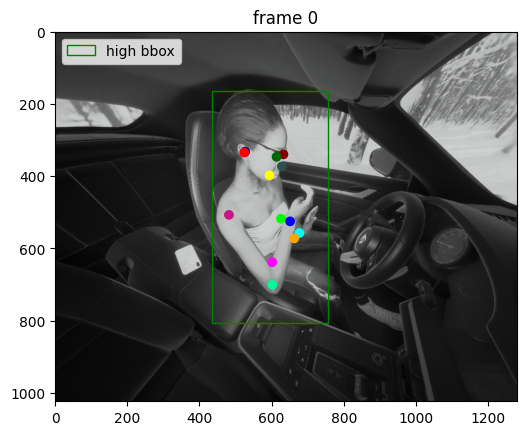

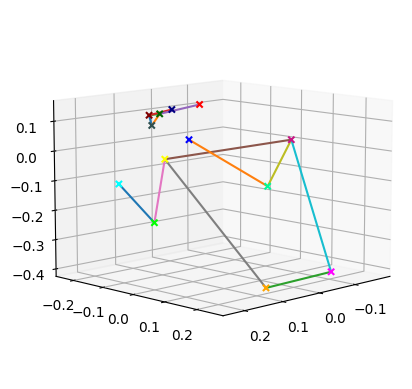

In [8]:
## Model Inference
mlp_lifter = trainer.model.to('cuda')
mlp_lifter.eval()
mmpose_results = mmpose_inferencer(images)
for idx, mmpose_result in enumerate(mmpose_results):
    print('idx', idx)
    image_results = mmpose_result['predictions'][0]
    fig, ax = plt.subplots()
    ax.imshow(images[idx])
    ax.set_title(f'frame {frame_numbers[idx]}')
    # find the best box
    best_box_idx = np.argmax([box['bbox_score'] for box in image_results])
    for idx, detected in enumerate(image_results):
        ## bounding box in top-left / bottom-right format
        # pprint(detected)
        bbox = detected['bbox']
        x = bbox[0][0]
        y = bbox[0][1]
        w = bbox[0][2] - bbox[0][0]
        h = bbox[0][3] - bbox[0][1]
        # print(x, y, w, h)
        if idx != best_box_idx:
            # print('idx', 'not best')
            # print(detected['bbox_score'])
            # pprint(detected['keypoint_scores'])
            # print(np.average(detected['keypoint_scores']))
            # print(np.average(detected['keypoint_scores'] / detected['bbox_score']))
            # draw lower match bbox as red
            rect = patches.Rectangle((x, y), w, h, linewidth=1, edgecolor='r', facecolor='none', label='low bbox')
        else:
            # draw highest match bbox as green
            rect = patches.Rectangle((x, y), w, h, linewidth=1, edgecolor='g', facecolor='none', label='high bbox')
            # plot 2D keypoints
            pose_2d = np.array(detected['keypoints'])
            # print('idx', 'best')
            # print(detected['bbox_score'])
            # pprint(detected['keypoint_scores'])
            # print('avereage_pose_score', np.average(detected['keypoint_scores'] / detected['bbox_score']))
            ax.scatter(pose_2d[:num_keypoints, 0], pose_2d[:num_keypoints, 1], c=joint_colors[:num_keypoints])
            image_height, image_width, _ = images[idx].shape

            # ### !! I think I forgot to center & normalize 2D pose input during training.
            # ### So, the result looks terrible.

            # pose_2d[:, 0] = pose_2d[:, 0] / image_height
            # pose_2d[:, 1] = pose_2d[:, 1] / image_width
            
            # New Scaling ###################################################
            # scale by the max-min position of 2D poses
            x_max, y_max = np.max(pose_2d[:, :2], axis=0)
            x_min, y_min = np.min(pose_2d[:, :2], axis=0)
            # max_length = np.max([x_max - x_min, y_max - y_min])
            w = x_max - x_min
            h = y_max - y_min
            # w = max_length
            # h = max_length
            bbox = [x_min, y_min, x_max, y_max]
            
            # center
            # use neck as the root. Neck is defined as the center of left/right shoulder
            root_2d = (pose_2d[5, :2] + pose_2d[6, :2]) / 2
            pose_2d[:, :2] = pose_2d[:, :2] - root_2d

            # root_3d = (keypoints3D[5, :] + keypoints3D[6, :]) / 2
            # keypoints3D = keypoints3D - root_3d
            pose_2d[:, 0] = pose_2d[:, 0] / w
            pose_2d[:, 1] = pose_2d[:, 1] / h
            pose_2d[:, :2], rotation_matrix = rotate2D_to_x_axis(pose_2d[5:7, :2], pose_2d[:, :2])
            # pose_3d = rotate3D_to_x_axis(pose_3d[5:7], pose_3d)
            #################################################################

            # print(pose_2d[:num_keypoints])
            norm_pose_2d = torch.flatten(torch.tensor(pose_2d[:num_keypoints])).unsqueeze(0).float().to('cuda')
            pose_3d = mlp_lifter(norm_pose_2d)
            # test_loader.dataset.samples[6]
            # pose_3d = mlp_lifter(torch.tensor(pose_2d[:num_keypoints]).unsqueeze(0).float().to('cuda'))
            pose_3d_np = pose_3d[0].cpu().reshape([-1, 3]).detach().numpy()
            # print(pose_3d_np)
            connections = generate_connection_line(pose_3d_np)
            x = pose_3d_np[:, 0]
            y = pose_3d_np[:, 1]
            z = pose_3d_np[:, 2]
            fig_3d = plt.figure()
            ax_3d = fig_3d.add_subplot(1, 1, 1, projection='3d')
            predict_plot = ax_3d.scatter3D(x, z, -y, c=joint_colors[:num_keypoints], marker='x', depthshade=False, label='Predict')

            for i in range(len(connections) // 2):
                ax_3d.plot3D(
                    [connections[2*i]['x'], connections[2*i + 1]['x']],
                    [connections[2*i]['z'], connections[2*i + 1]['z']],
                    [-connections[2*i]['y'], -connections[2*i + 1]['y']],
                )
            ax_3d.view_init(elev=10., azim=45, roll=0)
            # ax_3d.view_init(elev=10., azim=-90 + 45//2, roll=0)
        ax.add_patch(rect)
    ax.legend(loc='upper left')

In [9]:
norm_pose_2d = torch.flatten(torch.tensor(pose_2d[:num_keypoints])).unsqueeze(0).float().to('cuda')
pose_3d = mlp_lifter(norm_pose_2d)
print(norm_pose_2d)
print(pose_3d)

tensor([[ 2.8683e-01,  1.4211e-02,  3.3192e-01, -3.1197e-02,  2.8206e-01,
         -4.9608e-02,  1.0143e-01, -2.0429e-01,  9.3460e-02, -2.0441e-01,
          1.8379e-01, -1.3878e-17, -1.8379e-01,  1.3878e-17,  1.2833e-01,
          2.3579e-01, -1.1904e-01,  4.8398e-01,  2.0085e-01,  3.7522e-01,
          1.7741e-01,  2.8575e-01,  1.5314e-01,  3.7665e-01, -5.2469e-02,
          3.8666e-01]], device='cuda:0')
tensor([[ 5.9155e-02, -6.2772e-02, -1.8516e-01,  7.0799e-02, -1.0059e-01,
         -1.7925e-01,  2.4022e-02, -9.4087e-02, -2.0238e-01,  7.0735e-02,
         -1.3084e-01, -1.0310e-01, -4.8233e-02, -1.2095e-01, -1.5675e-01,
          1.7235e-01, -7.5993e-07, -2.1882e-05, -1.7297e-01, -6.6984e-06,
          1.1627e-06,  2.2556e-01,  1.9012e-01,  3.2563e-02, -1.5709e-01,
          1.7021e-01, -5.8230e-02,  1.6585e-01,  1.1170e-01, -1.6025e-01,
         -7.5803e-02,  1.7562e-02, -2.2639e-01,  1.1422e-01,  3.8520e-01,
          2.4421e-01, -7.8168e-02,  3.8786e-01,  2.2925e-01]], device='

In [10]:
test_loader.dataset.raw_data[6]

{'filenames': '000000000006.jpg',
 'keypoints2D': array([[634., 380.,   2.],
        [630., 339.,   2.],
        [616., 349.,   2.],
        [578., 326.,   2.],
        [532., 341.,   2.],
        [598., 401.,   2.],
        [475., 508.,   2.],
        [641., 500.,   2.],
        [604., 709.,   2.],
        [688., 564.,   2.],
        [650., 524.,   2.],
        [607., 592.,   2.],
        [570., 641.,   2.],
        [777., 580.,   2.],
        [747., 711.,   2.],
        [858., 756.,   2.],
        [822., 858.,   1.]]),
 'keypoints3D': array([[-0.01, -0.18,  0.48],
        [-0.01, -0.23,  0.48],
        [-0.03, -0.2 ,  0.43],
        [-0.09, -0.27,  0.52],
        [-0.12, -0.2 ,  0.41],
        [-0.08, -0.22,  0.71],
        [-0.22, -0.01,  0.48],
        [ 0.  , -0.03,  0.95],
        [-0.05,  0.28,  0.51],
        [ 0.1 ,  0.1 ,  0.72],
        [ 0.01,  0.02,  0.47],
        [-0.09,  0.22,  0.97],
        [-0.17,  0.31,  0.85],
        [ 0.34,  0.17,  0.89],
        [ 0.17,  0.32,  

In [11]:
# test_loader.dataset.samples[6]['keypoints2D'].shape
torch.flatten(torch.tensor(test_loader.dataset.samples[6]['keypoints2D'])).unsqueeze(0).float().to('cuda').shape

torch.Size([1, 39])

In [12]:
norm_pose_2d = torch.flatten(torch.tensor(test_loader.dataset.samples[6]['keypoints2D'][:,:2])).unsqueeze(0).float().to('cuda')
pose_3d = mlp_lifter(norm_pose_2d)
print(norm_pose_2d)
print(pose_3d)

tensor([[ 5.7492e-01,  2.0324e-02,  6.8709e-01, -6.7297e-02,  6.0668e-01,
         -7.1589e-02,  5.4295e-01, -1.8202e-01,  3.3380e-01, -2.3130e-01,
          3.8269e-01,  1.8552e-17, -3.8269e-01, -1.8552e-17,  2.2995e-01,
          2.6871e-01, -5.4511e-01,  6.1701e-01,  1.9922e-01,  4.7532e-01,
          1.8788e-01,  3.3141e-01, -1.7397e-01,  3.9167e-01, -4.5601e-01,
          4.2479e-01]], device='cuda:0')
tensor([[ 3.4907e-02, -7.2430e-02, -1.9165e-01,  6.0344e-02, -1.1247e-01,
         -1.8431e-01,  5.9424e-03, -1.1603e-01, -1.9932e-01,  8.1629e-02,
         -1.3746e-01, -1.0938e-01, -5.3413e-02, -1.4550e-01, -1.4199e-01,
          1.7993e-01, -1.9428e-07, -4.1193e-05, -1.8112e-01, -7.4925e-06,
          6.6189e-07,  2.3327e-01,  2.5414e-01,  4.3027e-02, -2.3507e-01,
          2.5327e-01, -1.0367e-01,  9.7267e-02,  2.7224e-01, -1.1432e-01,
         -7.6718e-02,  6.8729e-02, -1.9750e-01,  3.8635e-02,  4.8283e-01,
          2.1140e-01, -1.5499e-01,  4.4401e-01,  2.0067e-01]], device='

In [13]:
np.array(detected['keypoints']).shape

(17, 2)

In [14]:
np.array(test_loader.dataset.samples[6]['keypoints2D'][:,:2]).shape

(13, 2)

idx 0


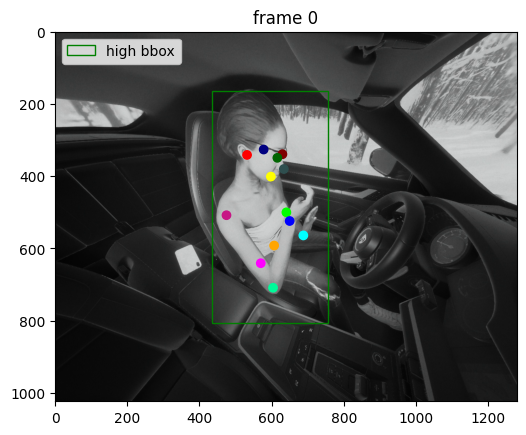

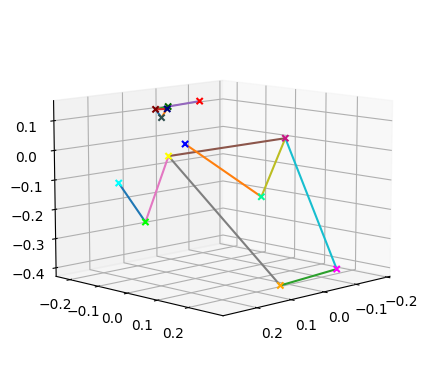

In [15]:
## Model Inference
mlp_lifter = trainer.model.to('cuda')
mlp_lifter.eval()
mmpose_results = mmpose_inferencer(images)
for idx, mmpose_result in enumerate(mmpose_results):
    print('idx', idx)
    image_results = mmpose_result['predictions'][0]
    fig, ax = plt.subplots()
    ax.imshow(images[idx])
    ax.set_title(f'frame {frame_numbers[idx]}')
    # find the best box
    best_box_idx = np.argmax([box['bbox_score'] for box in image_results])
    for idx, detected in enumerate(image_results):
        ## bounding box in top-left / bottom-right format
        # pprint(detected)
        bbox = detected['bbox']
        x = bbox[0][0]
        y = bbox[0][1]
        w = bbox[0][2] - bbox[0][0]
        h = bbox[0][3] - bbox[0][1]
        # print(x, y, w, h)
        if idx != best_box_idx:
            # print('idx', 'not best')
            # print(detected['bbox_score'])
            # pprint(detected['keypoint_scores'])
            # print(np.average(detected['keypoint_scores']))
            # print(np.average(detected['keypoint_scores'] / detected['bbox_score']))
            # draw lower match bbox as red
            rect = patches.Rectangle((x, y), w, h, linewidth=1, edgecolor='r', facecolor='none', label='low bbox')
        else:
            # draw highest match bbox as green
            rect = patches.Rectangle((x, y), w, h, linewidth=1, edgecolor='g', facecolor='none', label='high bbox')
            # plot 2D keypoints
            # pose_2d = np.array(detected['keypoints'])
            pose_2d = np.array(test_loader.dataset.raw_data[6]['keypoints2D'][:,:2])
            # print('idx', 'best')
            # print(detected['bbox_score'])
            # pprint(detected['keypoint_scores'])
            # print('avereage_pose_score', np.average(detected['keypoint_scores'] / detected['bbox_score']))
            ax.scatter(pose_2d[:num_keypoints, 0], pose_2d[:num_keypoints, 1], c=joint_colors[:num_keypoints])
            image_height, image_width, _ = images[idx].shape

            # ### !! I think I forgot to center & normalize 2D pose input during training.
            # ### So, the result looks terrible.

            # pose_2d[:, 0] = pose_2d[:, 0] / image_height
            # pose_2d[:, 1] = pose_2d[:, 1] / image_width
            
            # New Scaling ###################################################
            # scale by the max-min position of 2D poses
            x_max, y_max = np.max(pose_2d[:, :2], axis=0)
            x_min, y_min = np.min(pose_2d[:, :2], axis=0)
            # max_length = np.max([x_max - x_min, y_max - y_min])
            w = x_max - x_min
            h = y_max - y_min
            # w = max_length
            # h = max_length
            bbox = [x_min, y_min, x_max, y_max]
            
            # center
            # use neck as the root. Neck is defined as the center of left/right shoulder
            root_2d = (pose_2d[5, :2] + pose_2d[6, :2]) / 2
            pose_2d[:, :2] = pose_2d[:, :2] - root_2d

            # root_3d = (keypoints3D[5, :] + keypoints3D[6, :]) / 2
            # keypoints3D = keypoints3D - root_3d
            pose_2d[:, 0] = pose_2d[:, 0] / w
            pose_2d[:, 1] = pose_2d[:, 1] / h
            pose_2d[:, :2], rotation_matrix = rotate2D_to_x_axis(pose_2d[5:7, :2], pose_2d[:, :2])
            
            # pose_3d = rotate3D_to_x_axis(pose_3d[5:7], pose_3d)
            #################################################################

            # print(pose_2d[:num_keypoints])

            norm_pose_2d = pose_2d[:num_keypoints]
            # norm_pose_2d = test_loader.dataset.samples[6]['keypoints2D'][:,:2]

            norm_pose_2d = torch.flatten(torch.tensor(norm_pose_2d)).unsqueeze(0).float().to('cuda')
            pose_3d = mlp_lifter(norm_pose_2d)
            # test_loader.dataset.samples[6]
            # pose_3d = mlp_lifter(torch.tensor(pose_2d[:num_keypoints]).unsqueeze(0).float().to('cuda'))
            pose_3d_np = pose_3d[0].cpu().reshape([-1, 3]).detach().numpy()
            # print(pose_3d_np)
            connections = generate_connection_line(pose_3d_np)
            x = pose_3d_np[:, 0]
            y = pose_3d_np[:, 1]
            z = pose_3d_np[:, 2]
            fig_3d = plt.figure()
            ax_3d = fig_3d.add_subplot(1, 1, 1, projection='3d')
            predict_plot = ax_3d.scatter3D(x, z, -y, c=joint_colors[:num_keypoints], marker='x', depthshade=False, label='Predict')

            for i in range(len(connections) // 2):
                ax_3d.plot3D(
                    [connections[2*i]['x'], connections[2*i + 1]['x']],
                    [connections[2*i]['z'], connections[2*i + 1]['z']],
                    [-connections[2*i]['y'], -connections[2*i + 1]['y']],
                )
            ax_3d.view_init(elev=10., azim=45, roll=0)
            # ax_3d.view_init(elev=10., azim=-90 + 45//2, roll=0)
        ax.add_patch(rect)
    ax.legend(loc='upper left')